## Questão 1 - Trabalho de Engenharia Econômica - Modelo CAPM

In [ ]:
#Instalando a API do Yahoo Queery
!pip install yahooquery

In [2]:
#Importando as Bibliotecas Necessárias
from yahooquery import Ticker
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

In [3]:
# Configurando o plot para ele sair em alta definição 
plt.rcParams['figure.dpi'] = 100

In [4]:
#Coletando os dados da B3 pela API do Yahoo Query
ibov = Ticker("^BVSP") #Dados do IBOVESPA
data_set_ibov = ibov.history(start="2022-03-14")
itau = Ticker("ITUB4.SA") #Dados do Ativo ITUB4
data_set_itau = itau.history(start="2022-03-14")

# Iremos fazer primeiramente o tratamento dos dados do data set do ativo ITUB4

In [5]:
#Vizualizando o data set do ativo
data_set_itau

high      close    volume       open        low  \
symbol   date                                                               
ITUB4.SA 2022-03-14  25.540001  25.190001  32010100  25.020000  25.010000   
         2022-03-15  25.440001  25.100000  36823300  25.110001  24.700001   
         2022-03-16  25.660000  25.590000  40371600  25.350000  25.139999   
         2022-03-17  26.190001  26.150000  43343500  25.639999  25.459999   
         2022-03-18  26.600000  26.340000  64791300  26.090000  26.070000   
...                        ...        ...       ...        ...        ...   
         2022-09-08  27.000000  26.540001  28446400  26.900000  26.490000   
         2022-09-09  27.040001  26.750000  24457700  26.700001  26.620001   
         2022-09-12  27.320000  27.080000  26737400  27.000000  26.870001   
         2022-09-13  27.170000  26.799999  32479800  26.879999  26.700001   
         2022-09-14   0.000000  26.700001         0   0.000000   0.000000   

                      adjclose  dividends  
symbol   date                              
ITUB4.SA 2022-03-14  24.800814        0.0  
         2022-03-15  24.712204        0.0  
         2022-03-16  25.194633        0.0  
         2022-03-17  25.745979        0.0  
         2022-03-18  25.933044        0.0  
...                        ...        ...  
         2022-09-08  26.540001        0.0  
         2022-09-09  26.750000        0.0  
         2022-09-12  27.080000        0.0  
         2022-09-13  26.799999        0.0  
         2022-09-14  26.700001        0.0  

[129 rows x 7 columns]

In [6]:
# Transformando todas as variáveis da tabela em colunas com o reset_index
data_set_itau.reset_index(inplace=True) # o comando inplace=True faz a substituição diretamente no dataframe original

In [7]:
#Vizualizando o data set 
data_set_itau

,symbol,date,high,close,volume,open,low,adjclose,dividends
0,ITUB4.SA,2022-03-14,25.540001,25.190001,32010100,25.020000,25.010000,24.800814,0.0
1,ITUB4.SA,2022-03-15,25.440001,25.100000,36823300,25.110001,24.700001,24.712204,0.0
2,ITUB4.SA,2022-03-16,25.660000,25.590000,40371600,25.350000,25.139999,25.194633,0.0
3,ITUB4.SA,2022-03-17,26.190001,26.150000,43343500,25.639999,25.459999,25.745979,0.0
4,ITUB4.SA,2022-03-18,26.600000,26.340000,64791300,26.090000,26.070000,25.933044,0.0
...,...,...,...,...,...,...,...,...,...
124,ITUB4.SA,2022-09-08,27.000000,26.540001,28446400,26.900000,26.490000,26.540001,0.0
125,ITUB4.SA,2022-09-09,27.040001,26.750000,24457700,26.700001,26.620001,26.750000,0.0
126,ITUB4.SA,2022-09-12,27.320000,27.080000,26737400,27.000000,26.870001,27.080000,0.0
127,ITUB4.SA,2022-09-13,27.170000,26.799999,32479800,26.879999,26.700001,26.799999,0.0


In [8]:
#Removendo as colunas que não iremos usar para a análise
data_set_itau = data_set_itau.drop(['volume', 'open','high','low','adjclose','dividends'], axis=1)

In [9]:
#Vizualizando o dataset 
data_set_itau

,symbol,date,close
0,ITUB4.SA,2022-03-14,25.190001
1,ITUB4.SA,2022-03-15,25.100000
2,ITUB4.SA,2022-03-16,25.590000
3,ITUB4.SA,2022-03-17,26.150000
4,ITUB4.SA,2022-03-18,26.340000
...,...,...,...
124,ITUB4.SA,2022-09-08,26.540001
125,ITUB4.SA,2022-09-09,26.750000
126,ITUB4.SA,2022-09-12,27.080000
127,ITUB4.SA,2022-09-13,26.799999


# Agora iremos fazer o mesmo tratamento para o IBOVESPA

In [10]:
#Vizualizando o data set do ativo
data_set_ibov

close      high      open    volume       low  adjclose
symbol date                                                                  
^BVSP  2022-03-14  109928.0  112299.0  111716.0  10480900  109717.0  109928.0
       2022-03-15  108959.0  109925.0  109925.0  13653800  107781.0  108959.0
       2022-03-16  111112.0  111183.0  108958.0  13205200  108958.0  111112.0
       2022-03-17  113076.0  113088.0  111113.0  14407500  111070.0  113076.0
       2022-03-18  115311.0  115311.0  113076.0  19552500  112475.0  115311.0
...                     ...       ...       ...       ...       ...       ...
       2022-09-08  109916.0  110768.0  109771.0  13759500  108619.0  109916.0
       2022-09-09  112300.0  112540.0  109922.0  12155200  109922.0  112300.0
       2022-09-12  113407.0  114160.0  112307.0  11707100  112305.0  113407.0
       2022-09-13  110794.0  113400.0  113398.0  12612500  110522.0  110794.0
       2022-09-14  110547.0  111504.0  110794.0  11630900  110118.0  110547.0

[129 rows x 6 columns]

In [11]:
# Transformando todas as variáveis da tabela em colunas com o reset_index
data_set_ibov.reset_index(inplace=True) # o comando inplace=True faz a substituição diretamente no dataframe original

In [12]:
#Vizualizando o dataset
data_set_ibov

,symbol,date,close,high,open,volume,low,adjclose
0,^BVSP,2022-03-14,109928.0,112299.0,111716.0,10480900,109717.0,109928.0
1,^BVSP,2022-03-15,108959.0,109925.0,109925.0,13653800,107781.0,108959.0
2,^BVSP,2022-03-16,111112.0,111183.0,108958.0,13205200,108958.0,111112.0
3,^BVSP,2022-03-17,113076.0,113088.0,111113.0,14407500,111070.0,113076.0
4,^BVSP,2022-03-18,115311.0,115311.0,113076.0,19552500,112475.0,115311.0
...,...,...,...,...,...,...,...,...
124,^BVSP,2022-09-08,109916.0,110768.0,109771.0,13759500,108619.0,109916.0
125,^BVSP,2022-09-09,112300.0,112540.0,109922.0,12155200,109922.0,112300.0
126,^BVSP,2022-09-12,113407.0,114160.0,112307.0,11707100,112305.0,113407.0
127,^BVSP,2022-09-13,110794.0,113400.0,113398.0,12612500,110522.0,110794.0


In [13]:
# Removendo as colunas desnecessárias para a análise
data_set_ibov = data_set_ibov.drop(['volume', 'open','high','low','adjclose'], axis=1)

In [14]:
#Vizualizando o dataset
data_set_ibov

,symbol,date,close
0,^BVSP,2022-03-14,109928.0
1,^BVSP,2022-03-15,108959.0
2,^BVSP,2022-03-16,111112.0
3,^BVSP,2022-03-17,113076.0
4,^BVSP,2022-03-18,115311.0
...,...,...,...
124,^BVSP,2022-09-08,109916.0
125,^BVSP,2022-09-09,112300.0
126,^BVSP,2022-09-12,113407.0
127,^BVSP,2022-09-13,110794.0


# item a) Calcule os retornos contínuos do ativo selecionado, ITUB4, e do IBOVESPA. Usando a seguinte expressão

\begin{equation}
R_{continuo} = ln\left(\frac{P_t}{P_{t-1}}\right)
\end{equation}

Em que $P_t$ é o valor corrente do ativo e $P_{t-1}$ é o valor base do ativo

In [15]:
#Cálculo dos retornos continuos para o ativo ITUB4
valor_corrente_itau = data_set_itau['close']
valor_base_itau = valor_corrente_itau.shift(1)
data_set_itau['Retornos Continuos'] = np.log(valor_corrente_itau/valor_base_itau)

In [17]:
#Cálculo dos retornos continuos para o IBOVESPA
valor_corrente_ibov = data_set_ibov['close']
valor_base_ibov = valor_corrente_ibov.shift(1)
data_set_ibov['Retornos Continuos'] = np.log(valor_corrente_ibov/valor_base_ibov)

In [18]:
#Vizualizando o data set do ativo
data_set_itau

,symbol,date,close,Retornos Continuos
0,ITUB4.SA,2022-03-14,25.190001,NaN
1,ITUB4.SA,2022-03-15,25.100000,-0.003579
2,ITUB4.SA,2022-03-16,25.590000,0.019334
3,ITUB4.SA,2022-03-17,26.150000,0.021648
4,ITUB4.SA,2022-03-18,26.340000,0.007240
...,...,...,...,...
124,ITUB4.SA,2022-09-08,26.540001,-0.007133
125,ITUB4.SA,2022-09-09,26.750000,0.007881
126,ITUB4.SA,2022-09-12,27.080000,0.012261
127,ITUB4.SA,2022-09-13,26.799999,-0.010394


In [19]:
#Vizualizando o data set do IBOVESPA
data_set_ibov

,symbol,date,close,Retornos Continuos
0,^BVSP,2022-03-14,109928.0,NaN
1,^BVSP,2022-03-15,108959.0,-0.008854
2,^BVSP,2022-03-16,111112.0,0.019567
3,^BVSP,2022-03-17,113076.0,0.017521
4,^BVSP,2022-03-18,115311.0,0.019573
...,...,...,...,...
124,^BVSP,2022-09-08,109916.0,0.001384
125,^BVSP,2022-09-09,112300.0,0.021457
126,^BVSP,2022-09-12,113407.0,0.009809
127,^BVSP,2022-09-13,110794.0,-0.023310


In [20]:
#Como temos valores Not a Number (NaN) no nossos datasets, iremos retira-los
data_set_itau_limpo = data_set_itau.dropna()
data_set_ibov_limpo = data_set_ibov.dropna()

In [21]:
#Vizualizando o dataset limpo do ativo 
data_set_itau_limpo

,symbol,date,close,Retornos Continuos
1,ITUB4.SA,2022-03-15,25.100000,-0.003579
2,ITUB4.SA,2022-03-16,25.590000,0.019334
3,ITUB4.SA,2022-03-17,26.150000,0.021648
4,ITUB4.SA,2022-03-18,26.340000,0.007240
5,ITUB4.SA,2022-03-21,26.990000,0.024378
...,...,...,...,...
124,ITUB4.SA,2022-09-08,26.540001,-0.007133
125,ITUB4.SA,2022-09-09,26.750000,0.007881
126,ITUB4.SA,2022-09-12,27.080000,0.012261
127,ITUB4.SA,2022-09-13,26.799999,-0.010394


In [22]:
#Vizualizando o dataset limpo do IBOV
data_set_ibov_limpo

,symbol,date,close,Retornos Continuos
1,^BVSP,2022-03-15,108959.0,-0.008854
2,^BVSP,2022-03-16,111112.0,0.019567
3,^BVSP,2022-03-17,113076.0,0.017521
4,^BVSP,2022-03-18,115311.0,0.019573
5,^BVSP,2022-03-21,116155.0,0.007293
...,...,...,...,...
124,^BVSP,2022-09-08,109916.0,0.001384
125,^BVSP,2022-09-09,112300.0,0.021457
126,^BVSP,2022-09-12,113407.0,0.009809
127,^BVSP,2022-09-13,110794.0,-0.023310


# item b) Encontre a regressão tendo como eixo Y os retornos continuos do ativo (ITUB4) e X os retornos continuos do IBOVESPA

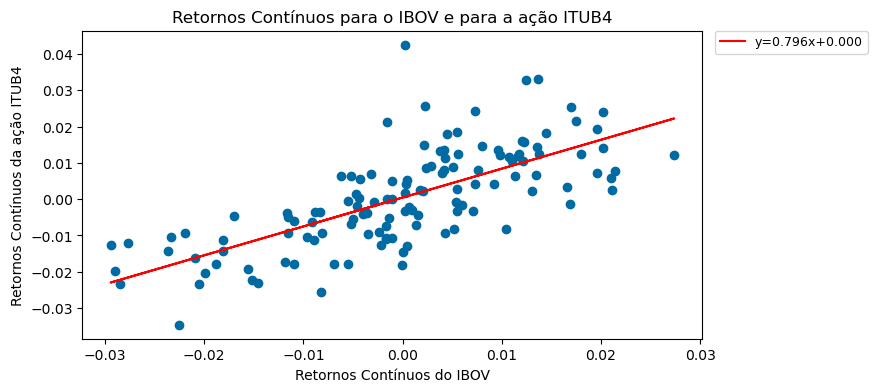

In [27]:
# Plotando o gráfico
fig, ax = plt.subplots(figsize=(8,4))
ax.scatter(data_set_ibov_limpo['Retornos Continuos'],
            data_set_itau_limpo['Retornos Continuos'],
            color = '#006BA2') #Cor azul
ax.set_ylabel("Retornos Contínuos da ação ITUB4")
ax.set_xlabel("Retornos Contínuos do IBOV")
plt.title("Retornos Contínuos para o IBOV e para a ação ITUB4", loc='center')   
#Fazendo a regressão 
y = data_set_itau_limpo['Retornos Continuos']
x = data_set_ibov_limpo['Retornos Continuos']
regressao_ibov_itau = slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
line = slope*x+intercept
plt.plot(x, line, 'red', label='y={:.3f}x+{:.3f}'.format(slope,intercept))
plt.legend(fontsize=9,loc = 'upper left', borderaxespad = 0,bbox_to_anchor=(1.02, 1))
plt.show() 

# item c) Calcule o $\beta$ da regressão

In [39]:
#Podemos calcular o Beta usando o método dos Mínimos Quadrados Ordinários
y = data_set_itau_limpo['Retornos Continuos'].tolist()
x = data_set_ibov_limpo['Retornos Continuos'].tolist()
# Adicionando o termo constante 
x = sm.add_constant(x)
model = sm.OLS(y,x)
results = model.fit()
print(results.summary())  

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.506
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     129.1
Date:                Wed, 14 Sep 2022   Prob (F-statistic):           5.00e-21
Time:                        16:10:14   Log-Likelihood:                 413.60
No. Observations:                 128   AIC:                            -823.2
Df Residuals:                     126   BIC:                            -817.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.001      0.522      0.6

# Assim o nosso $\beta$ é igual a $0,7962$. Como já havia sido indicado no gráfico também pela legenda

# item d) Calcule o CAPM com o $\beta$ da regressão e retorno do ativo livre de risco pela taxa Selic, na maioria do período, de $3\%$ ao ano. Usar o Retorno médio do mercado pela média, diária, do Retorno do IBOVESPA no período considerado (lembrar de compatibilizar as taxas e depois transformar todas as taxas em taxas anuais – Exemplo de Regressão da Aula 8 nas Aulas de Revisão Estatística).

O modelo CAPM é dado por 
\begin{equation}
E(R_{ativo}) = R_{f} + \beta(E(R_{mercado}) - R_{f})
\end{equation}

Em que $E(R_{ativo})$ é retorno esperado do ativo, $R_{f}$ é o retorno do ativo livre de risco, nesse caso a Taxa SELIC, $\beta$ é o coeficiente da regressão calculado previamente e $E(R_{mercado})$ é o retorno esperado de mercado. 

In [ ]:
#Primeiramente, com os dados que temos, iremos calcular o retorno médio do IBOVESPA diário e depois convertemos para valores anuais 
R_mercado_diario = np.mean(data_set_ibov_limpo['Retornos Continuos'])
R_mercado_anual = np.power(1 + R_mercado_diario,365-1) #Conversão para anual
print(R_mercado_anual)

In [39]:
# Cálculo do CAPM 
#Definindo as variáveis 
R_f = 0.03 
beta = 0.796
Retorno_Esperado_Itau = R_f + beta*(R_mercado_anual - R_f)
print("O Retorno Esperado do Ativo escolhido em taxas anuais, pelo CAPM, é:",Retorno_Esperado_Itau)


O Retorno Esperado do Ativo escolhido em taxas anuais, pelo CAPM, é: 0.8149323667575273
